## 1) Środowisko wirtualne python-venv

In [58]:
# python3 -m venv ha_influxdb_venv
# source ha_influxdb_venv/bin/activate
# pip install --upgrade pip
# pip install influxdb
# pip install pandas
# pip install matplotlib
# pip install jupyter
# jupyter notebook

## 2) Import bibliotek

In [59]:
from influxdb import DataFrameClient

import pandas as pd
import numpy as np
from datetime import datetime

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

## 3) Połączenie do bazy InfluxDB

In [60]:
client = DataFrameClient(host='192.168.1.5', port=8086, username='jupyterlab', password='jupyterlab', database='homeassistant')

In [61]:
client.ping()

'1.8.10'

## 4) Pobranie jednostek miar z bazy

In [62]:
client.get_list_measurements()

[{'name': ' '},
 {'name': '%'},
 {'name': '% available'},
 {'name': 'A'},
 {'name': 'B'},
 {'name': 'CAQI'},
 {'name': 'Connections'},
 {'name': 'Cos φ'},
 {'name': 'GB'},
 {'name': 'GHz'},
 {'name': 'GiB'},
 {'name': 'KiB/s'},
 {'name': 'MB'},
 {'name': 'Mb/s'},
 {'name': 'MiB'},
 {'name': 'PLN'},
 {'name': 'V'},
 {'name': 'VA'},
 {'name': 'VAr'},
 {'name': 'W'},
 {'name': '[GWh]'},
 {'name': 'cm'},
 {'name': 'dBm'},
 {'name': 'floors'},
 {'name': 'fps'},
 {'name': 'gCO2eq/kWh'},
 {'name': 'h'},
 {'name': 'hPa'},
 {'name': 'hPa/h'},
 {'name': 'kB'},
 {'name': 'kWh'},
 {'name': 'lqi'},
 {'name': 'lx'},
 {'name': 'm'},
 {'name': 'm/s'},
 {'name': 'ms'},
 {'name': 'm³'},
 {'name': 'objects'},
 {'name': 'packets'},
 {'name': 'packets/s'},
 {'name': 'pending update(s)'},
 {'name': 'queries'},
 {'name': 'requests'},
 {'name': 's'},
 {'name': 'state'},
 {'name': 'steps'},
 {'name': 'targets'},
 {'name': '°C'},
 {'name': '°C/h'},
 {'name': 'µGHz/s'},
 {'name': 'µg/m³'},
 {'name': '℃'}]

## 5) Lista encji HA

In [84]:
client.get_list_series()

## 6) Query do bazy

### 6.1) query #1: pobranie wszystkich encji HA z bazy InfluxDB dla np. pomiarów w "°C"

In [64]:
results = client.query('SELECT * FROM "°C" ')

In [65]:
results = results["°C"]
results = results.reset_index()
results

,index,attribution_str,device_class_str,domain,entity_id,friendly_name_str,state_class_str,value
0,2021-11-01 00:00:11.973617+00:00,None,temperature,sensor,processor_temperature,Processor temperature,total,36.00
1,2021-11-01 00:00:26.975167+00:00,None,temperature,sensor,processor_temperature,Processor temperature,total,35.00
2,2021-11-01 00:00:41.977120+00:00,None,temperature,sensor,processor_temperature,Processor temperature,total,34.00
3,2021-11-01 00:00:42.620802+00:00,None,temperature,sensor,xiaomi_salon_temperature,Salon Temp,measurement,21.10
4,2021-11-01 00:00:42.627261+00:00,None,None,sensor,dew_point,dew point,None,8.99
...,...,...,...,...,...,...,...,...
4204907,2022-09-14 11:02:24.498052+00:00,None,None,sensor,dew_point,dew point,None,13.56
4204908,2022-09-14 11:02:24.502985+00:00,None,temperature,sensor,xiaomi_salon_temperature_2,Xiaomi_Salon Temperature,measurement,21.10
4204909,2022-09-14 11:02:48.392013+00:00,None,temperature,sensor,processor_temperature,Processor temperature,measurement,43.00
4204910,2022-09-14 11:02:54.524842+00:00,None,None,sensor,dew_point,dew point,None,13.58


### 6.2) query #2: wszystkie encje HA dla "°C" z ostatnich 30 dni

In [66]:
results = client.query('SELECT * FROM "°C" WHERE time > now() - 30d AND time < now()')
df = results['°C'].reset_index()
df

,index,attribution_str,device_class_str,domain,entity_id,friendly_name_str,state_class_str,value
0,2022-08-15 11:05:27.903608+00:00,None,temperature,sensor,processor_temperature,Processor temperature,measurement,45.00
1,2022-08-15 11:05:40.941949+00:00,None,temperature,sensor,xiaomi_salon_temperature,Salon TEMP,measurement,24.10
2,2022-08-15 11:05:40.945470+00:00,None,None,sensor,dew_point,dew point,None,20.51
3,2022-08-15 11:05:41.005174+00:00,None,temperature,sensor,xiaomi_salon_temperature_2,Xiaomi_Salon Temperature,measurement,24.10
4,2022-08-15 11:05:42.904990+00:00,None,temperature,sensor,processor_temperature,Processor temperature,measurement,44.00
...,...,...,...,...,...,...,...,...
355007,2022-09-14 11:05:14.931341+00:00,None,temperature,sensor,xiaomi_salon_temperature_2,Xiaomi_Salon Temperature,measurement,21.10
355008,2022-09-14 11:05:18.399608+00:00,None,temperature,sensor,processor_temperature,Processor temperature,measurement,47.00
355009,2022-09-14 11:05:19.390694+00:00,None,temperature,sensor,xiaomi_lazienka_gora_temperature,Xiaomi_Lazienka_gora Temperature,measurement,25.50
355010,2022-09-14 11:05:19.435566+00:00,None,temperature,sensor,xiaomi_lazienka_gora_temperature_2,Xiaomi_Lazienka_gora Temperature,measurement,25.50


### 6.3) query #3: states dla "°C" z ostatnich 30 dni dla wybranego sensora (np. 'airly_temperature_2')

In [67]:
sensor = 'airly_temperature_2'                  # wpisujemy dowolny dla "°C" 

df_airly_temp_30 = df[df['entity_id'] == sensor ]
df_airly_temp_30.head()

,index,attribution_str,device_class_str,domain,entity_id,friendly_name_str,state_class_str,value
22,2022-08-15 11:07:20.305122+00:00,Data provided by Airly,temperature,sensor,airly_temperature_2,Airly Temperature,measurement,26.3
83,2022-08-15 11:12:20.323502+00:00,Data provided by Airly,temperature,sensor,airly_temperature_2,Airly Temperature,measurement,26.4
200,2022-08-15 11:27:20.330430+00:00,Data provided by Airly,temperature,sensor,airly_temperature_2,Airly Temperature,measurement,26.5
383,2022-08-15 11:47:20.338499+00:00,Data provided by Airly,temperature,sensor,airly_temperature_2,Airly Temperature,measurement,26.6
509,2022-08-15 12:02:20.310447+00:00,Data provided by Airly,temperature,sensor,airly_temperature_2,Airly Temperature,measurement,26.7


## 7) Nowy dataframe dla wybranego sensora - usuwamy niepotrzebne kolumny

In [68]:
new_df = df_airly_temp_30.drop(columns=['attribution_str', 'device_class_str', 'domain', 'entity_id', 'friendly_name_str', 'state_class_str' ])
new_df.head()

,index,value
22,2022-08-15 11:07:20.305122+00:00,26.3
83,2022-08-15 11:12:20.323502+00:00,26.4
200,2022-08-15 11:27:20.330430+00:00,26.5
383,2022-08-15 11:47:20.338499+00:00,26.6
509,2022-08-15 12:02:20.310447+00:00,26.7


In [69]:
print("W zebranych danych mamy :", new_df.shape[0], " rekordów dla sensora", sensor)

W zebranych danych mamy : 5061  rekordów dla sensora airly_temperature_2


### 7.1) zmiana formatu daty na "%Y-%m-%d" i przygotowanie nowego dataframe z datą jako index

In [70]:
new_df['new_date'] = new_df.iloc[:,0].apply(lambda x: datetime.strptime(x.strftime("%Y-%m-%d"), "%Y-%m-%d"))

In [71]:
new_df = new_df[['new_date','value']]
new_df.head()

,new_date,value
22,2022-08-15,26.3
83,2022-08-15,26.4
200,2022-08-15,26.5
383,2022-08-15,26.6
509,2022-08-15,26.7


## 8) Funkcja obliczające trend na bazie pandas.polyfit()

### 8.1) Przygotowanie osi X dla wykresu do pre

In [72]:
x= np.arange(new_df['new_date'].size)
x

array([   0,    1,    2, ..., 5058, 5059, 5060])

### 8.2) Predykcja trendu (średnioterminowego dla 30 dni)

In [80]:
#Fit function : y = mx + c [regresja liniowa ]

fit = np.polyfit(x,new_df['value'], deg=1)
print ("m = : " + str(fit[0]))
print ("c = : " + str(fit[1]))

m = : -0.0027976049117296466
c = : 26.179540900890604


In [82]:
if fit[0] > 0:
    trend = 1
    print("Trend rosnący:", trend)
elif fit[0]:
    trend = -1
    print("Trend malejący:", trend)

Trend malejący: -1


### 8.3) Wykres linii trendu

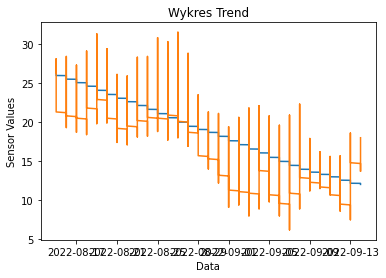

In [75]:
fit_function = np.poly1d(fit)

plt.plot(new_df['new_date'], fit_function(x))     
plt.plot(new_df['new_date'], new_df['value'])

plt.xlabel('Data')
plt.ylabel('Sensor Values')
plt.title('Wykres Trend')
plt.show()

## 9) Bonus: wykorzystanie funkcji z integracji Trend z HA

In [76]:
def calculate_gradient(X,Y):
    """Compute the linear trend gradient of the current samples. """
    timestamps = X
    values = Y
    coeffs = np.polyfit(timestamps, values, 1)
    return coeffs[0]

In [77]:
x = x
y = new_df['value']

In [78]:
calculate_gradient(x,y)

-0.0027976049117296466

### 9.1) binary_sensor

In [83]:
if calculate_gradient(x,y) > 0:
    trend = 1
    print("Trend rosnący:", trend)
elif calculate_gradient(x,y) < 0:
    trend = -1
    print("Trend malejący:", trend)

Trend malejący: -1
